In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from msresist.figures.common import TimePointFoldChange

In [2]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

### YAP Reporter Signal

In [3]:
# Import data files
cx_rxdx_yap = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/YAPreporter/110822-YAPreporter_DR_CX4945_Red_vs_Phase.csv")
e_r428_yap = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/YAPreporter/110822-YAPreporter_DR_E_EA_ER428_Red_vs_Phase.csv")

# Remove ".1" TR labels
cx_rxdx_yap.columns = [s.split(".")[0] for s in cx_rxdx_yap.columns]
e_r428_yap.columns = [s.split(".")[0] for s in e_r428_yap.columns]

# One data point per row
cx_rxdx_yap_long = pd.melt(frame=cx_rxdx_yap, id_vars=["Elapsed"], value_vars=list(cx_rxdx_yap.columns[1:]), value_name="Norm YAP signal", var_name="Well").sort_values(by="Well").set_index("Well")
e_r428_yap_long = pd.melt(frame=e_r428_yap, id_vars=["Elapsed"], value_vars=list(e_r428_yap.columns[1:]), value_name="Norm YAP signal", var_name="Well").sort_values(by="Well").set_index("Well")

In [4]:
ea = e_r428_yap_long[
    ~(e_r428_yap_long.index.str.contains(";"))
].reset_index()

e500r428 = e_r428_yap_long[
    (e_r428_yap_long.index.str.contains(";")) &
    (e_r428_yap_long.index.str.contains("E-500")) |
    (e_r428_yap_long.index == "UT") |
    ~(e_r428_yap_long.index.str.contains(";")) &
    ~(e_r428_yap_long.index.str.contains("AF154"))
].reset_index()

e1000r428 = e_r428_yap_long[
    (e_r428_yap_long.index.str.contains(";")) &
    (e_r428_yap_long.index.str.contains("E-1000")) |
    (e_r428_yap_long.index == "UT") |
    ~(e_r428_yap_long.index.str.contains(";")) &
    ~(e_r428_yap_long.index.str.contains("AF154"))
].reset_index()

e500cx = cx_rxdx_yap_long[
    (cx_rxdx_yap_long.index.str.contains("E-500")) &
    (cx_rxdx_yap_long.index.str.contains("CX4945")) |
    (cx_rxdx_yap_long.index == "UT")
].reset_index()

e1000cx = cx_rxdx_yap_long[
    (cx_rxdx_yap_long.index.str.contains("E-1000")) &
    (cx_rxdx_yap_long.index.str.contains("CX4945")) |
    (cx_rxdx_yap_long.index == "UT")
].reset_index()

e500rxdx = cx_rxdx_yap_long[
    (cx_rxdx_yap_long.index.str.contains("E-500")) &
    (cx_rxdx_yap_long.index.str.contains("RXDX106")) |
    (cx_rxdx_yap_long.index == "UT")
].reset_index()

e1000rxdx = cx_rxdx_yap_long[
    (cx_rxdx_yap_long.index.str.contains("E-1000")) &
    (cx_rxdx_yap_long.index.str.contains("RXDX106")) |
    (cx_rxdx_yap_long.index == "UT")
].reset_index()

In [13]:
e1000rxdx.set_index("Well").loc[["E-1000;RXDX106-1000"]]

,Elapsed,Norm YAP signal
Well,,
E-1000;RXDX106-1000,132,0.623819
E-1000;RXDX106-1000,135,0.629239
E-1000;RXDX106-1000,3,0.234498
E-1000;RXDX106-1000,78,0.678424
E-1000;RXDX106-1000,81,0.686006
...,...,...
E-1000;RXDX106-1000,54,0.474159
E-1000;RXDX106-1000,57,0.485069
E-1000;RXDX106-1000,60,0.487782


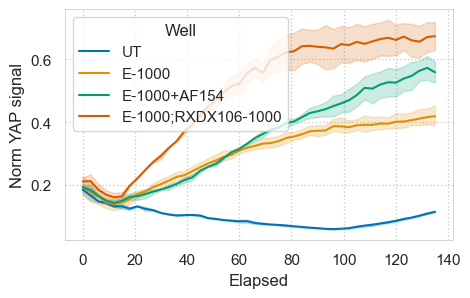

In [20]:
df = pd.concat([ea.set_index("Well").loc[["UT", "E-1000", "E-1000+AF154"]], e1000rxdx.set_index("Well").loc[["E-1000;RXDX106-1000"]]])
_, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.lineplot(df.reset_index(), x="Elapsed", hue="Well", y="Norm YAP signal", ax=ax)
plt.savefig("rxdx.svg")

#### Erlotinib + AF154

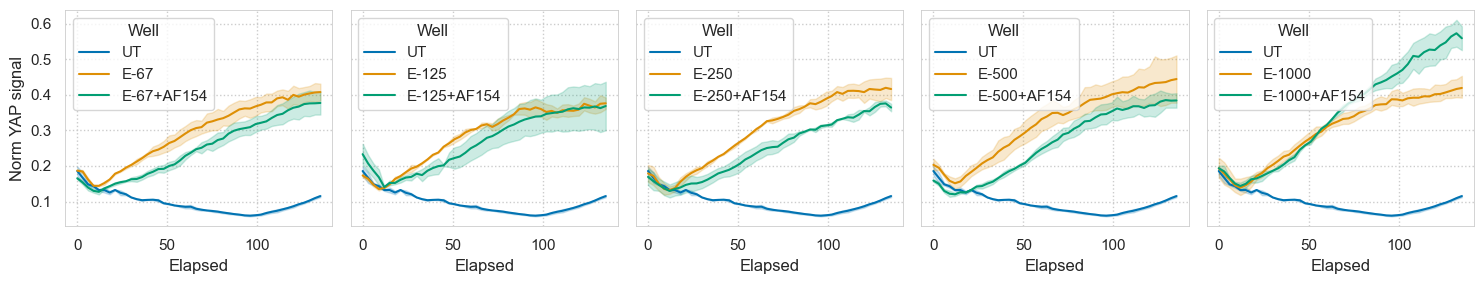

In [5]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_ea = ea[
        (ea["Well"] == "UT") |
        (ea["Well"].str.contains(d))
        ]
    sns.lineplot(curr_ea, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-" + d, "E-" + d + "+AF154"])

plt.tight_layout()
# plt.savefig("YAP_EA_rep.svg")

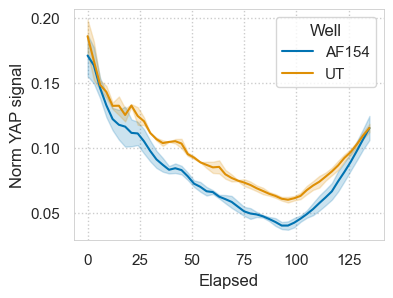

In [16]:
af = ea[(ea["Well"] == "AF154") | (ea["Well"] == "UT")]
_, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.lineplot(af, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax)
plt.savefig("YAP_UTvsAF_rep.svg")

#### Erlotinib + R428
Erlotinib 500nM:

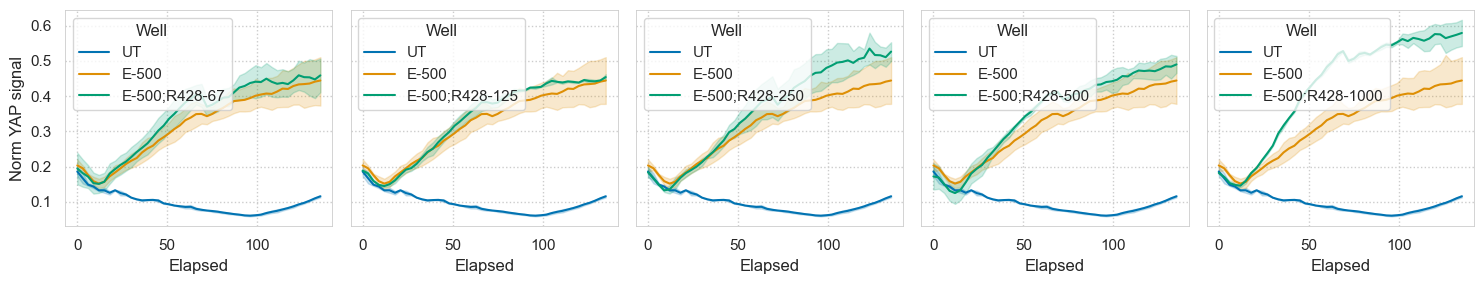

In [7]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "500":
        curr_e500r428 = e500r428.set_index("Well").loc[["UT", "E-500", "E-500;R428-500"]]
    else:
        curr_e500r428 = e500r428[
        (e500r428["Well"] == "UT") |
        (e500r428["Well"] == "E-500") |
        (e500r428["Well"].str.contains("E-500;R428-" + d))
        ]
    sns.lineplot(curr_e500r428, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;R428-" + d])

plt.tight_layout()

Erlotinib 1000nM:

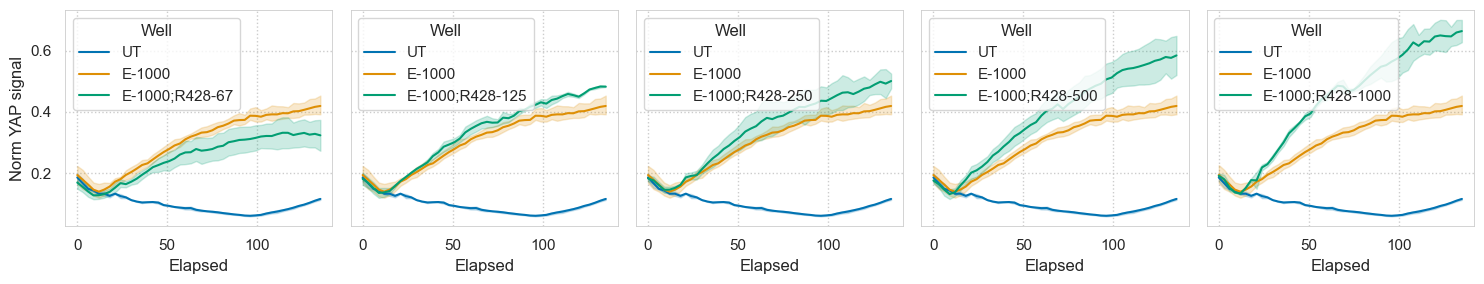

In [17]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "1000":
        curr_e1000r428 = e1000r428.set_index("Well").loc[["UT", "E-1000", "E-1000;R428-1000"]]
    else:
        curr_e1000r428 = e1000r428[
        (e1000r428["Well"] == "UT") |
        (e1000r428["Well"] == "E-1000") |
        (e1000r428["Well"].str.contains("E-1000;R428-" + d))
        ]
    sns.lineplot(curr_e1000r428, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;R428-" + d])

plt.tight_layout()
plt.savefig("R428.svg")

#### Erlotinib + RXDX106
Erlotinib 500nM

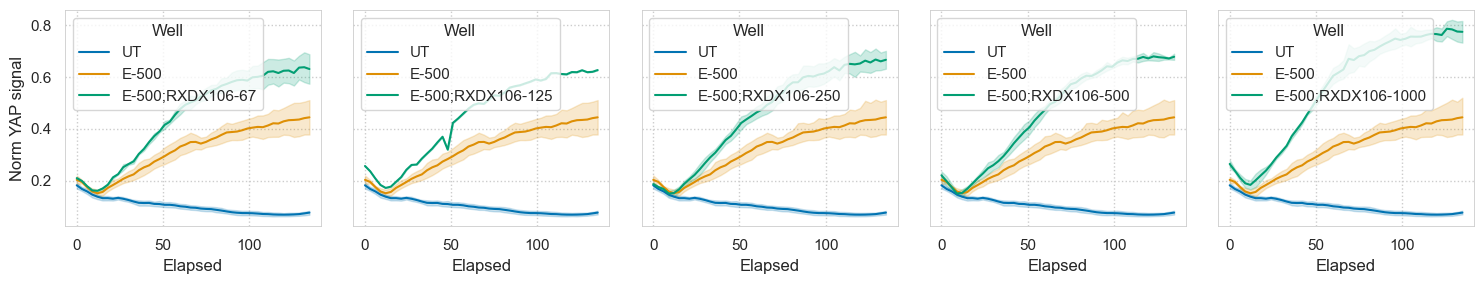

In [6]:
e500rxdx = pd.concat([e500rxdx, e1000r428[e1000r428["Well"] == "E-500"]])
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "500":
        curr_e500rxdx = e500rxdx.set_index("Well").loc[["UT", "E-500", "E-500;RXDX106-500"]]
    else:
        curr_e500rxdx = e500rxdx[
        (e500rxdx["Well"] == "UT") |
        (e500rxdx["Well"] == "E-500") |
        (e500rxdx["Well"].str.contains("E-500;RXDX106-" + d))
        ]
    sns.lineplot(curr_e500rxdx, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;RXDX106-" + d])

plt.tight_layout()
plt.savefig("RXDX.svg")

Erlotinib 1000nM

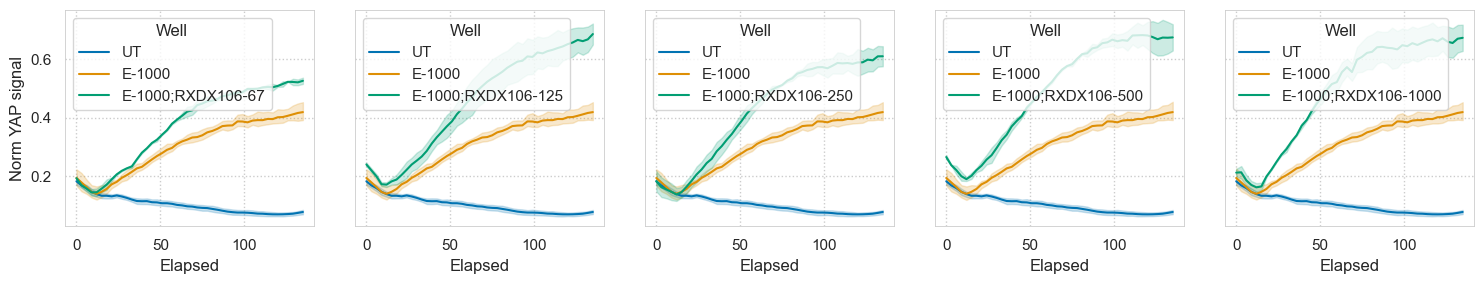

In [7]:
e1000rxdx = pd.concat([e1000rxdx, e1000r428[e1000r428["Well"] == "E-1000"]])
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "1000":
        curr_e1000rxdx = e1000rxdx.set_index("Well").loc[["UT", "E-1000", "E-1000;RXDX106-1000"]]
    else:
        curr_e1000rxdx = e1000rxdx[
        (e1000rxdx["Well"] == "UT") |
        (e1000rxdx["Well"] == "E-1000") |
        (e1000rxdx["Well"].str.contains("E-1000;RXDX106-" + d))
        ]
    sns.lineplot(curr_e1000rxdx, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;RXDX106-" + d])

plt.tight_layout()
plt.savefig("rxdx.svg")

### Erlotinib + CX4945
Erlotinib 500nM:

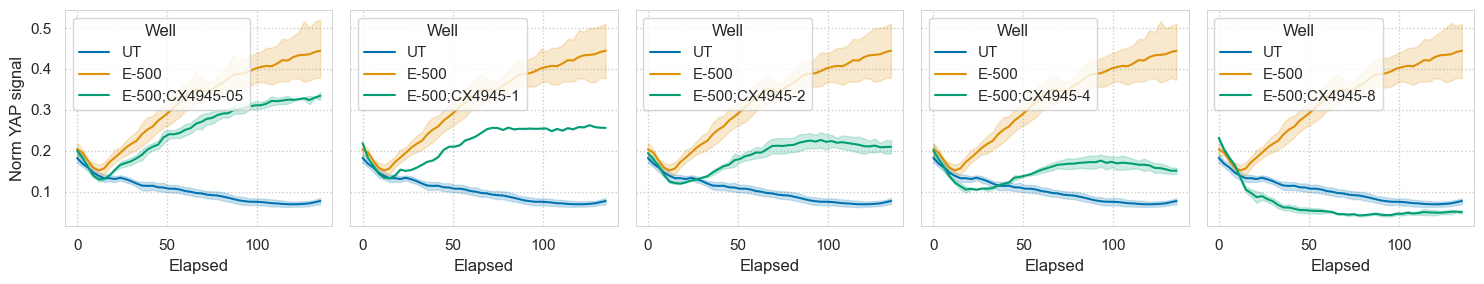

In [16]:
e500cx = pd.concat([e500cx, e1000r428[e1000r428["Well"] == "E-500"]])
dr = ["05", "1", "2", "4", "8"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_e500cx = e500cx[
    (e500cx["Well"] == "UT") |
    (e500cx["Well"] == "E-500") |
    (e500cx["Well"].str.contains("E-500;CX4945-" + d))
    ]
    sns.lineplot(curr_e500cx, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;CX4945-" + d])

plt.tight_layout()

Erlotinib 1000nM:

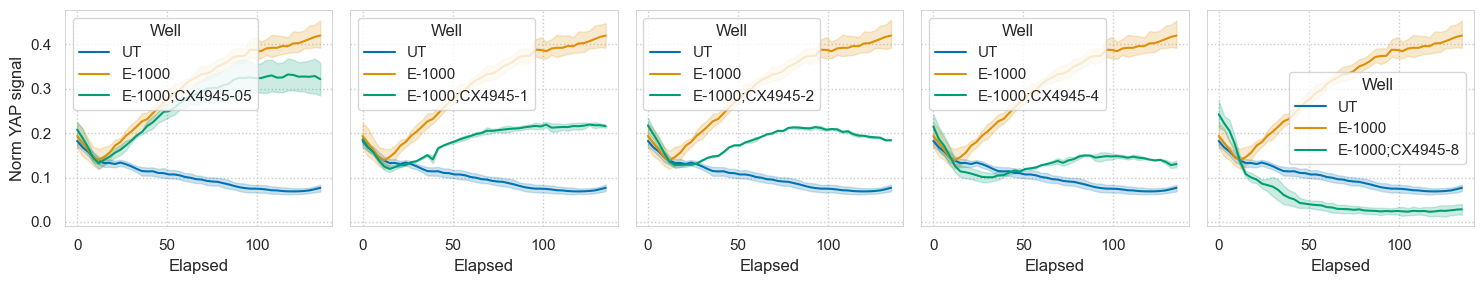

In [19]:
e1000cx = pd.concat([e1000cx, e1000r428[e1000r428["Well"] == "E-1000"]])
dr = ["05", "1", "2", "4", "8"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_e1000cx = e1000cx[
    (e1000cx["Well"] == "UT") |
    (e1000cx["Well"] == "E-1000") |
    (e1000cx["Well"].str.contains("E-1000;CX4945-" + d))
    ]
    sns.lineplot(curr_e1000cx, x="Elapsed", y="Norm YAP signal", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;CX4945-" + d])

plt.tight_layout()
plt.savefig("CX4945.svg")

### Cell Confluency

In [55]:
cx_rxdx = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/YAPreporter/110822-YAPreporter_DR_CX4945_Confluency.csv")
e_r428 = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/YAPreporter/110822-YAPreporter_DR_E_EA_ER428_Confluency.csv")

cx_rxdx.columns = [s.split(".")[0] for s in cx_rxdx.columns]
e_r428.columns = [s.split(".")[0] for s in e_r428.columns]

itp = 15
cx_rxdx = TimePointFoldChange(cx_rxdx, itp)
e_r428 = TimePointFoldChange(e_r428, itp)

cx_rxdx_long = pd.melt(frame=cx_rxdx, id_vars=["Elapsed"], value_vars=list(cx_rxdx.columns[1:]), value_name="Norm Cell Confluency", var_name="Well").sort_values(by="Well").set_index("Well")
e_r428_long = pd.melt(frame=e_r428, id_vars=["Elapsed"], value_vars=list(e_r428.columns[1:]), value_name="Norm Cell Confluency", var_name="Well").sort_values(by="Well").set_index("Well")

In [56]:
ea = e_r428_long[
    ~(e_r428_long.index.str.contains(";"))
].reset_index()

e500r428 = e_r428_long[
    (e_r428_long.index.str.contains(";")) &
    (e_r428_long.index.str.contains("E-500")) |
    (e_r428_long.index == "UT") |
    ~(e_r428_long.index.str.contains(";")) &
    ~(e_r428_long.index.str.contains("AF154"))
].reset_index()

e1000r428 = e_r428_long[
    (e_r428_long.index.str.contains(";")) &
    (e_r428_long.index.str.contains("E-1000")) |
    (e_r428_long.index == "UT") |
    ~(e_r428_long.index.str.contains(";")) &
    ~(e_r428_long.index.str.contains("AF154"))
].reset_index()

e500cx = cx_rxdx_long[
    (cx_rxdx_long.index.str.contains("E-500")) &
    (cx_rxdx_long.index.str.contains("CX4945")) |
    (cx_rxdx_long.index == "UT")
].reset_index()

e1000cx = cx_rxdx_long[
    (cx_rxdx_long.index.str.contains("E-1000")) &
    (cx_rxdx_long.index.str.contains("CX4945")) |
    (cx_rxdx_long.index == "UT")
].reset_index()

e500rxdx = cx_rxdx_long[
    (cx_rxdx_long.index.str.contains("E-500")) &
    (cx_rxdx_long.index.str.contains("RXDX106")) |
    (cx_rxdx_long.index == "UT")
].reset_index()

e1000rxdx = cx_rxdx_long[
    (cx_rxdx_long.index.str.contains("E-1000")) &
    (cx_rxdx_long.index.str.contains("RXDX106")) |
    (cx_rxdx_long.index == "UT")
].reset_index()

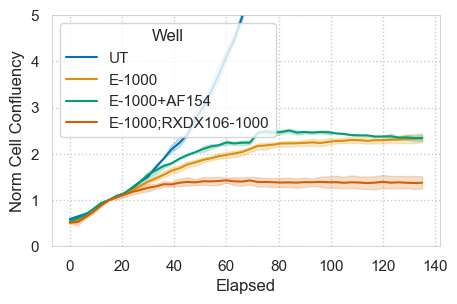

In [57]:
df = pd.concat([ea.set_index("Well").loc[["UT", "E-1000", "E-1000+AF154"]], e1000rxdx.set_index("Well").loc[["E-1000;RXDX106-1000"]]])
_, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.set_ylim(0, 5)
ax.set_
sns.lineplot(df.reset_index(), x="Elapsed", hue="Well", y="Norm Cell Confluency", ax=ax)
plt.savefig("rxdx.svg")

#### Erlotinib + AF154

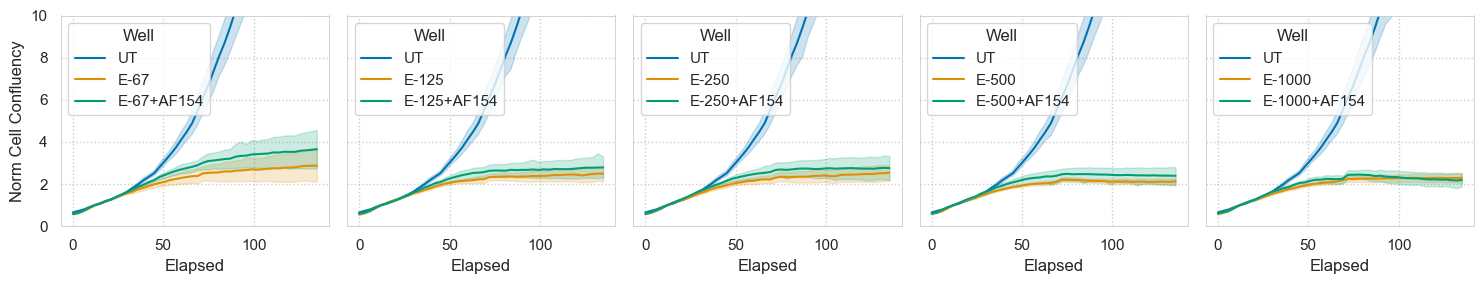

In [46]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_ea = ea[
        (ea["Well"] == "UT") |
        (ea["Well"].str.contains(d))
        ]
    sns.lineplot(curr_ea, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-" + d, "E-" + d + "+AF154"])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

#### Erlotinib + R428
Erlotinib 500nM:

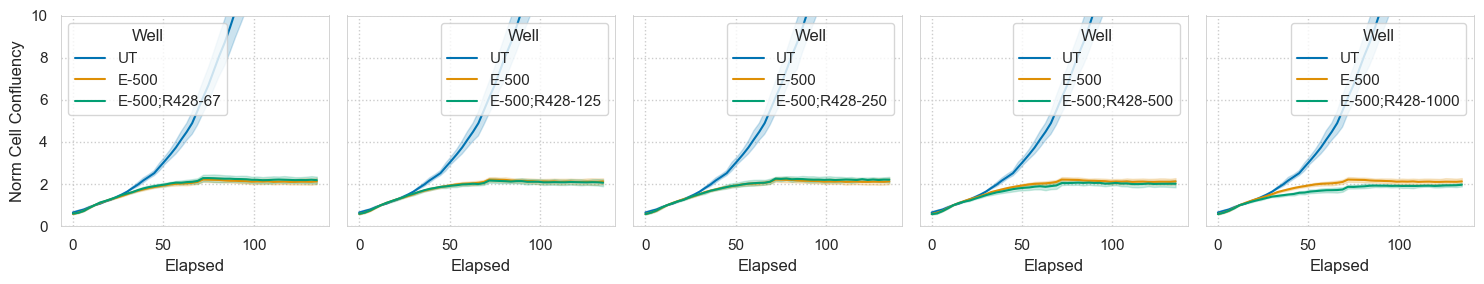

In [40]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "500":
        curr_e500r428 = e500r428.set_index("Well").loc[["UT", "E-500", "E-500;R428-500"]]
    else:
        curr_e500r428 = e500r428[
        (e500r428["Well"] == "UT") |
        (e500r428["Well"] == "E-500") |
        (e500r428["Well"].str.contains("E-500;R428-" + d))
        ]
    sns.lineplot(curr_e500r428, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;R428-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

Erlotinib 1000nM:

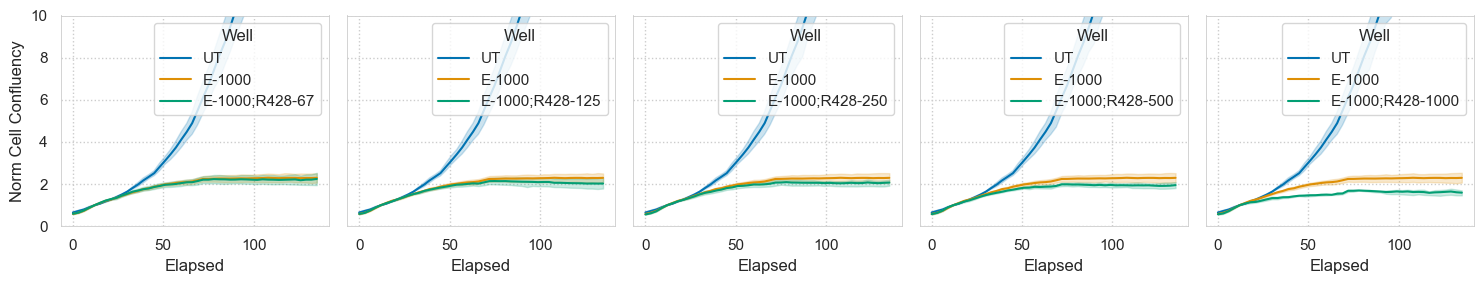

In [41]:
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "1000":
        curr_e1000r428 = e1000r428.set_index("Well").loc[["UT", "E-1000", "E-1000;R428-1000"]]
    else:
        curr_e1000r428 = e1000r428[
        (e1000r428["Well"] == "UT") |
        (e1000r428["Well"] == "E-1000") |
        (e1000r428["Well"].str.contains("E-1000;R428-" + d))
        ]
    sns.lineplot(curr_e1000r428, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;R428-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

#### Erlotinib + RXDX106
Erlotinib 500nM

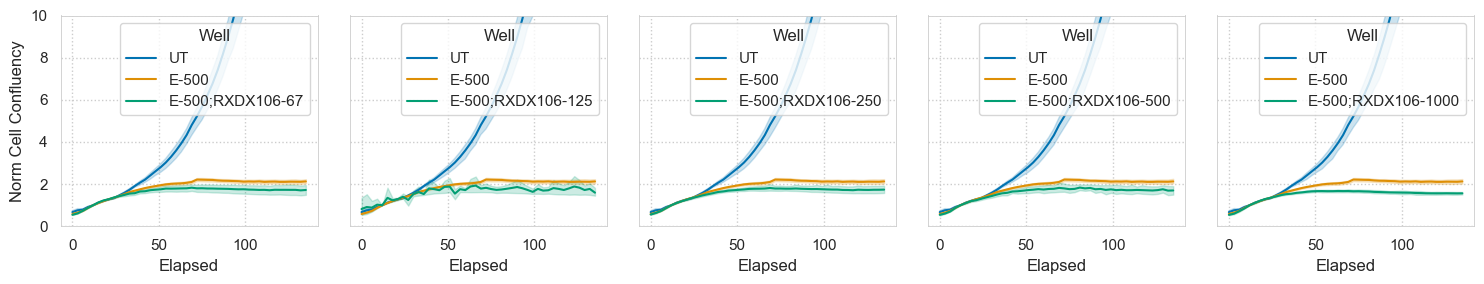

In [43]:
e500rxdx = pd.concat([e500rxdx, e1000r428[e1000r428["Well"] == "E-500"]])
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "500":
        curr_e500rxdx = e500rxdx.set_index("Well").loc[["UT", "E-500", "E-500;RXDX106-500"]]
    else:
        curr_e500rxdx = e500rxdx[
        (e500rxdx["Well"] == "UT") |
        (e500rxdx["Well"] == "E-500") |
        (e500rxdx["Well"].str.contains("E-500;RXDX106-" + d))
        ]
    sns.lineplot(curr_e500rxdx, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;RXDX106-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

Erlotinib 1000nM

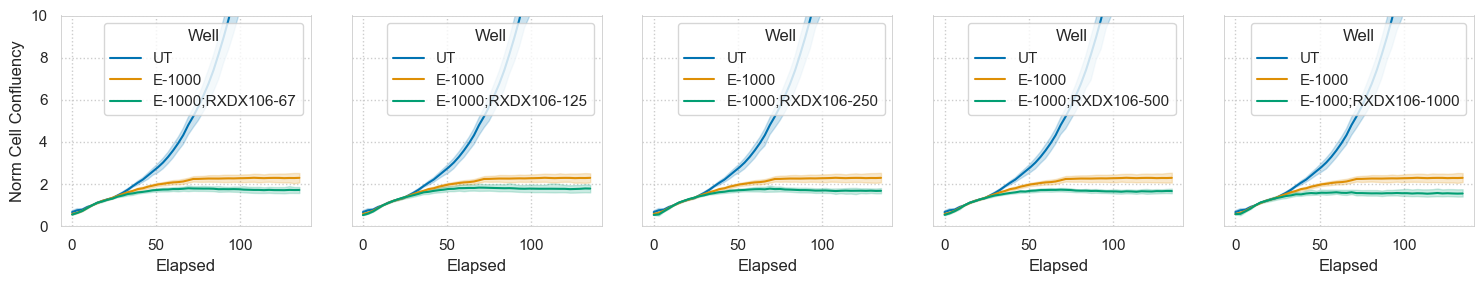

In [44]:
e1000rxdx = pd.concat([e1000rxdx, e1000r428[e1000r428["Well"] == "E-1000"]])
dr = ["67", "125", "250", "500", "1000"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    if d == "1000":
        curr_e1000rxdx = e1000rxdx.set_index("Well").loc[["UT", "E-1000", "E-1000;RXDX106-1000"]]
    else:
        curr_e1000rxdx = e1000rxdx[
        (e1000rxdx["Well"] == "UT") |
        (e1000rxdx["Well"] == "E-1000") |
        (e1000rxdx["Well"].str.contains("E-1000;RXDX106-" + d))
        ]
    sns.lineplot(curr_e1000rxdx, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;RXDX106-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

### Erlotinib + CX4945
Erlotinib 500nM:

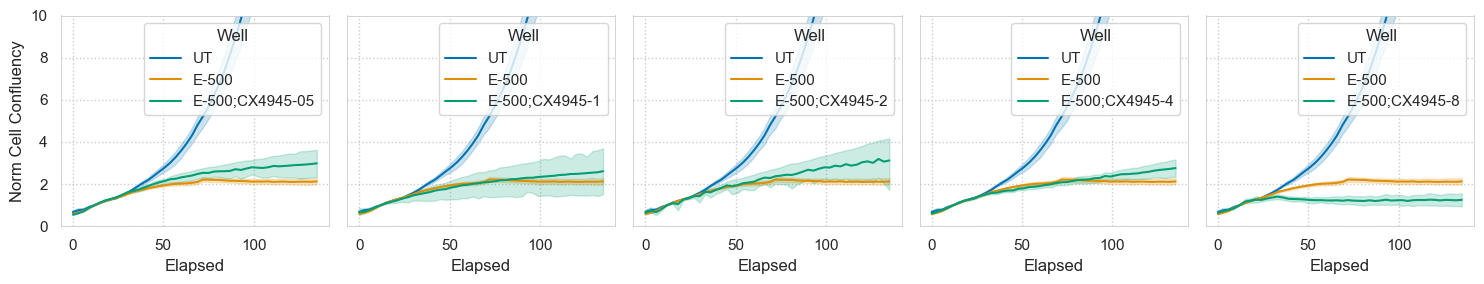

In [47]:
e500cx = pd.concat([e500cx, e1000r428[e1000r428["Well"] == "E-500"]])
dr = ["05", "1", "2", "4", "8"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_e500cx = e500cx[
    (e500cx["Well"] == "UT") |
    (e500cx["Well"] == "E-500") |
    (e500cx["Well"].str.contains("E-500;CX4945-" + d))
    ]
    sns.lineplot(curr_e500cx, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-500", "E-500;CX4945-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()

Erlotinib 1000nM:

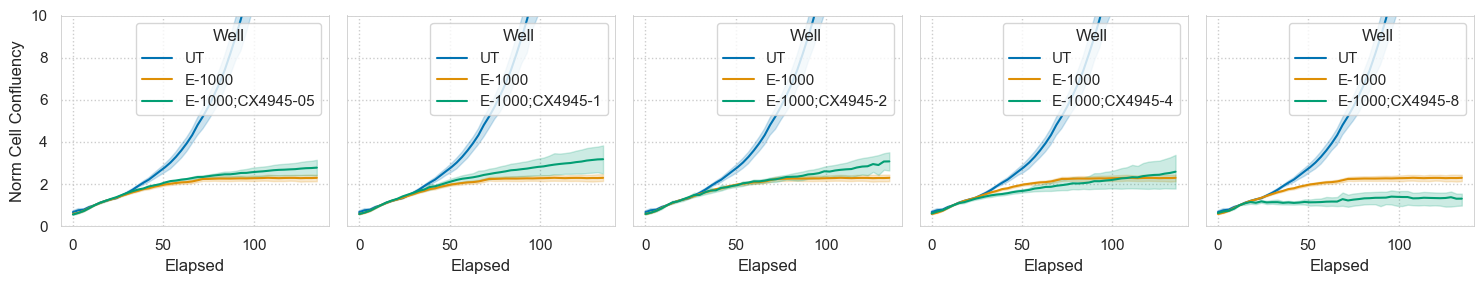

In [49]:
e1000cx = pd.concat([e1000cx, e1000r428[e1000r428["Well"] == "E-1000"]])
dr = ["05", "1", "2", "4", "8"]
_, ax = plt.subplots(1, len(dr), figsize=(15, 3), sharey=True)
for ii, d in enumerate(dr):
    curr_e1000cx = e1000cx[
    (e1000cx["Well"] == "UT") |
    (e1000cx["Well"] == "E-1000") |
    (e1000cx["Well"].str.contains("E-1000;CX4945-" + d))
    ]
    sns.lineplot(curr_e1000cx, x="Elapsed", y="Norm Cell Confluency", hue="Well", ax=ax[ii], hue_order=["UT", "E-1000", "E-1000;CX4945-" + d])
    ax[ii].set_ylim(0, 10)

plt.tight_layout()